In [ ]:
import pandas as pd


In [ ]:
# --- Step 1: Load the data correctly, using the first column as the index --- #
tracks = pd.read_csv('tracks.csv', index_col=0, header=[0, 1])
features = pd.read_csv('features.csv', index_col=0, header=[0, 1, 2])

In [ ]:
# --- Step 2: Flatten the column headers for easier access --- #
tracks.columns = ['_'.join(col).strip() for col in tracks.columns.values]
features.columns = ['_'.join(col).strip() for col in features.columns.values]

In [ ]:
# --- Step 3: Select only the tracks from the 'small' subset --- #
# This line should now work correctly.
small_tracks = tracks[tracks['set_subset'] == 'small']

In [ ]:
# --- Step 4: Get the audio features for just those small_tracks --- #
small_features = features.loc[small_tracks.index]

In [ ]:
# --- Step 5: Combine the features and the genre into our final DataFrame --- #
df_eda = small_features.copy()
df_eda['genre'] = small_tracks['track_genre_top']

In [ ]:
# --- Display the results to confirm it worked --- #
print("--- Final DataFrame for EDA ---")
print(df_eda.head())
print("\nShape of our final dataset:", df_eda.shape)
print("\nGenres we will be analyzing:")
print(df_eda['genre'].value_counts())

--- Final DataFrame for EDA ---
          chroma_cens_kurtosis_01  chroma_cens_kurtosis_02  \
track_id                                                     
2                        7.180653                 5.230309   
5                        0.527563                -0.077654   
10                       3.702245                -0.291193   
140                      0.533579                -0.623885   
141                      0.172898                -0.284804   

          chroma_cens_kurtosis_03  chroma_cens_kurtosis_04  \
track_id                                                     
2                        0.249321                 1.347620   
5                       -0.279610                 0.685883   
10                       2.196742                -0.234449   
140                     -1.086205                -1.081079   
141                     -1.169662                -1.062855   

          chroma_cens_kurtosis_05  chroma_cens_kurtosis_06  \
track_id                            

/tmp/ipython-input-22-3725455623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=df_eda, order = df_eda['genre'].value_counts().index, palette='viridis')


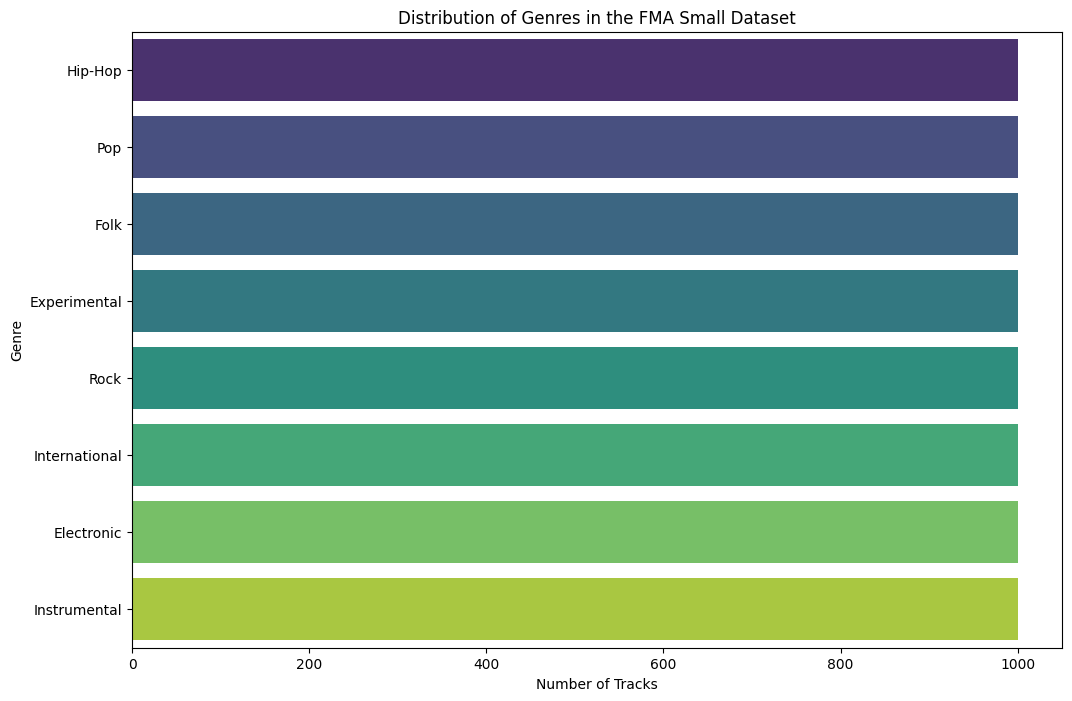

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(y='genre', data=df_eda, order = df_eda['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres in the FMA Small Dataset')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-25-2891879186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='zcr_mean_01', data=df_eda, palette='magma')


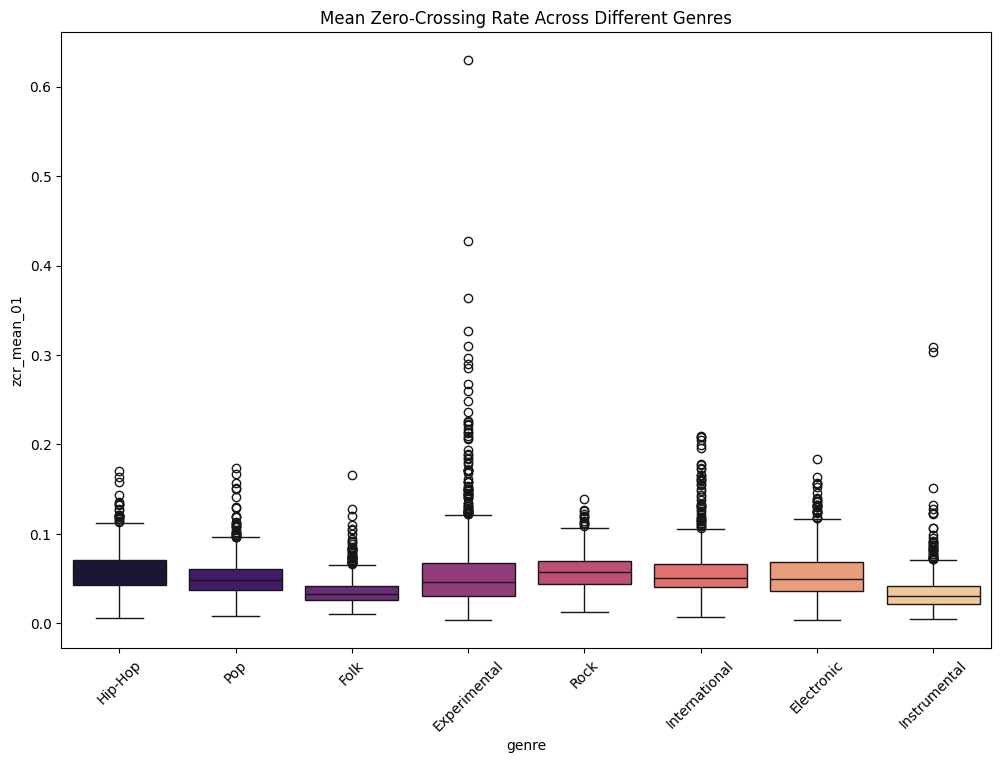

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='zcr_mean_01', data=df_eda, palette='magma')

plt.title('Mean Zero-Crossing Rate Across Different Genres')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# --- Prepare the data --- #
# X contains all the audio features
X = df_eda.drop('genre', axis=1)
# y contains the genre labels
y = df_eda['genre']

In [ ]:
# --- Step 1: Scale the Features --- #
# PCA is sensitive to the scale of the data, so we standardize it first.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# --- Step 2: Apply PCA --- #
# We are reducing our 500+ features down to just 2 Principal Components.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# --- Step 3: Create a new DataFrame with the PCA results --- #
# This makes it easy to plot with Seaborn.
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['genre'] = y.values # Add the genre labels

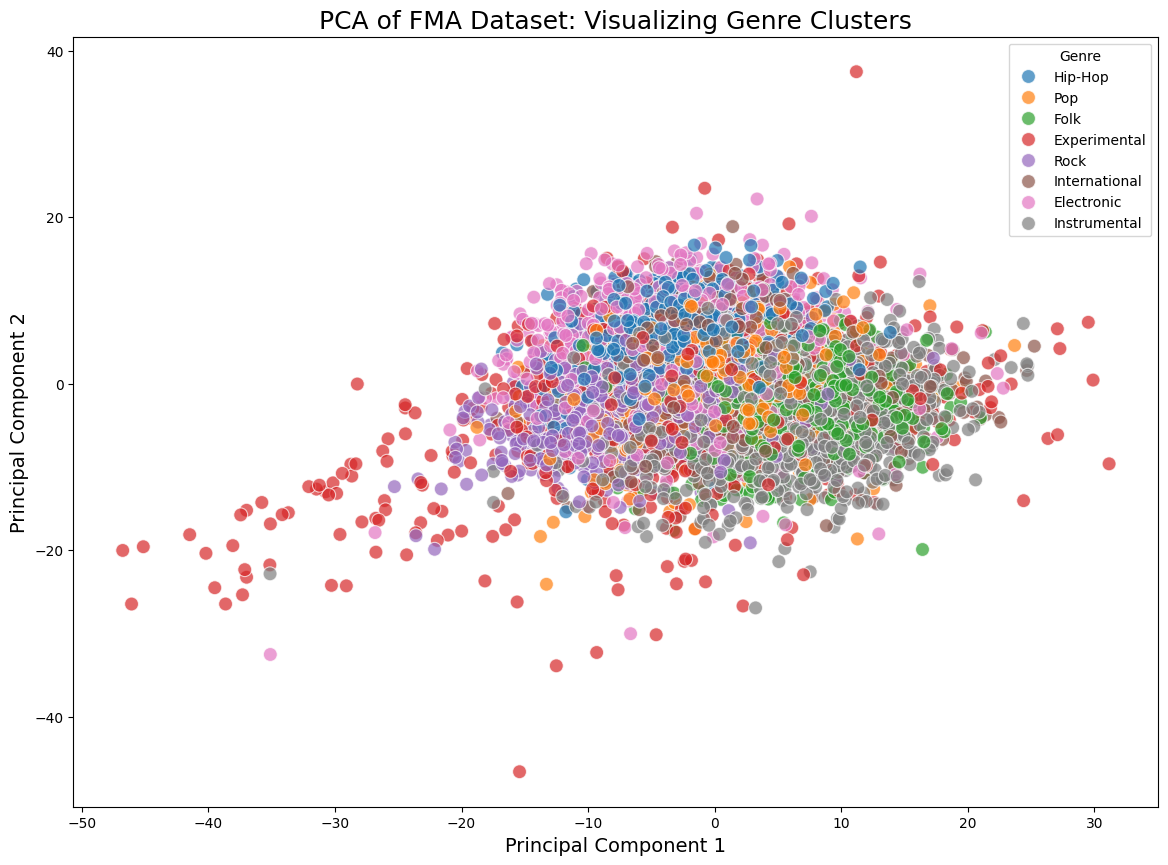

In [ ]:
# --- Step 4: Create the Scatter Plot --- #
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='genre', # Color the points by their genre
    data=df_pca,
    alpha=0.7,
    s=100 # Adjust point size
)
plt.title('PCA of FMA Dataset: Visualizing Genre Clusters', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Genre')
